<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/carretera.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

Librerías básicas de esta notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 1

## 1.1 Imagen original

Obtenga una imagen (libro, revista, etc..) por medio de su celular

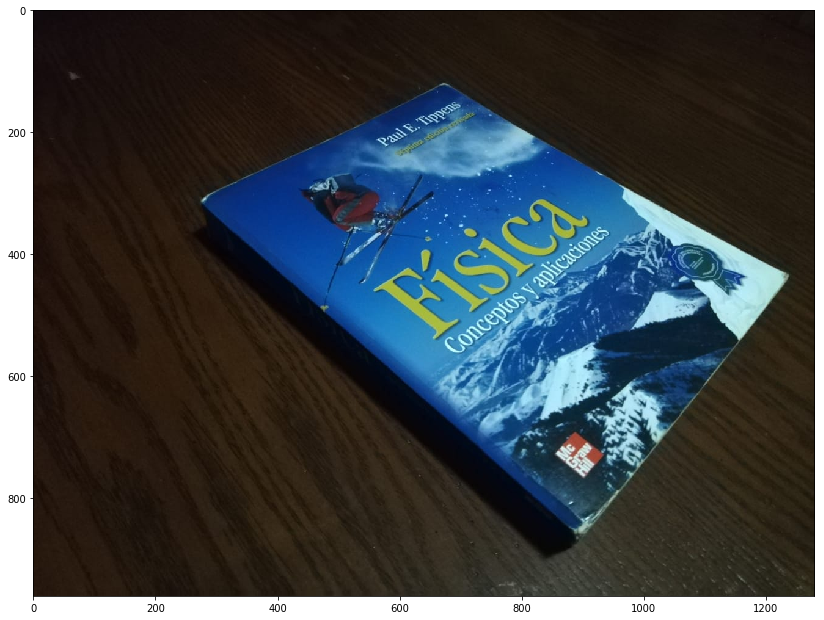

In [2]:
img = cv.imread("figuras/fisica.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,14))
plt.imshow(img)
plt.show()

## 1.2 Ampliar vista

Ampliar y mejorar la visibilidad del plano cartesiano


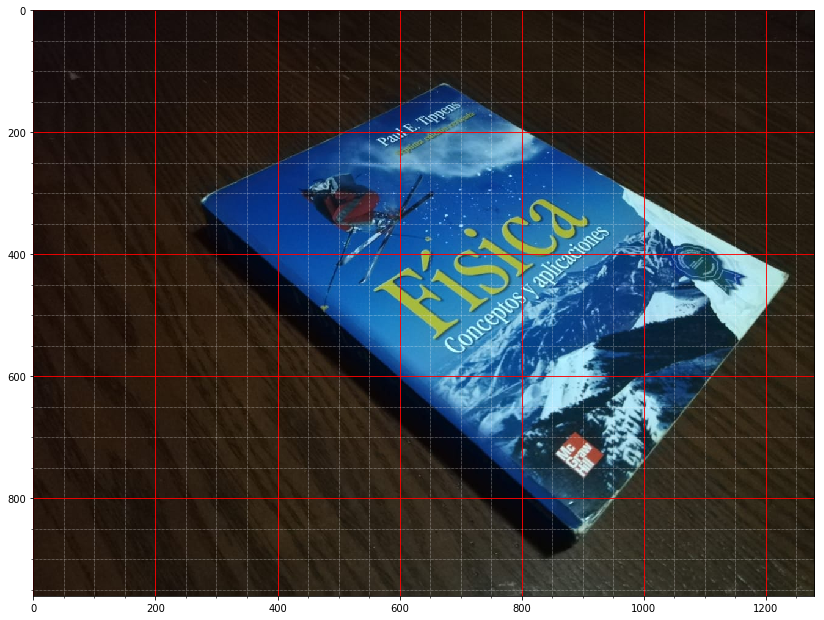

In [3]:
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.9", color="red")
ax.grid(which="minor", linestyle=":", linewidth="0.5", color="white")

## 1.3 Puntos de las esquinas

Utilizando la imagen original encontrar y marcar los puntos de las esquinas


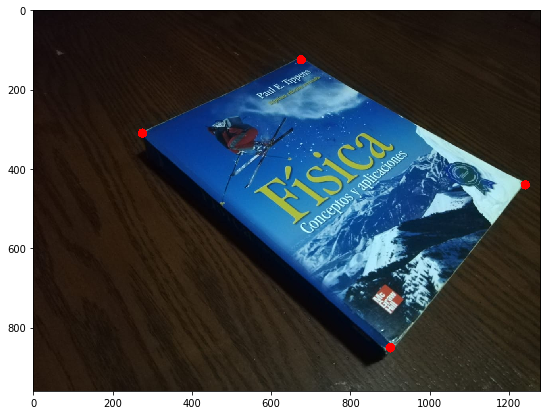

In [4]:
img = cv.imread("figuras/fisica.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
cv.circle(img, (275,310), 12, (255,0,0), -1)
cv.circle(img, (675,125), 12, (255,0,0), -1)
cv.circle(img, (900,850), 12, (255,0,0), -1)
cv.circle(img, (1240,440), 12, (255,0,0), -1)
plt.imshow(img)
plt.show()

## 1.4 Matriz de transformación y cambio de perspectiva

Obteniendo la matriz de transformación y cambiando de perspectiva.

No fue necesario cambiar el tamaño (500,600), queda bien la imagen final con esos tamaños.


In [5]:
pts1 = np.float32([[275,310], [675,125], [900,850], [1240,440]])
pts2 = np.float32([[0,0], [500,0], [0,600], [500,600]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (500,600))
print("Forma de matrix: ", matrix.shape)
print("Forma de img_warp: ", img_warp.shape)

Forma de matrix:  (3, 3)
Forma de img_warp:  (600, 500, 3)


## 1.5 Imagen final 

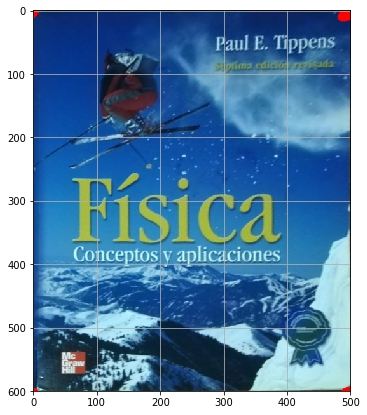

In [6]:
plt.figure(figsize = (10,7))
plt.imshow(img_warp)
plt.grid()
plt.show()

## 1.6 Todas las operaciones

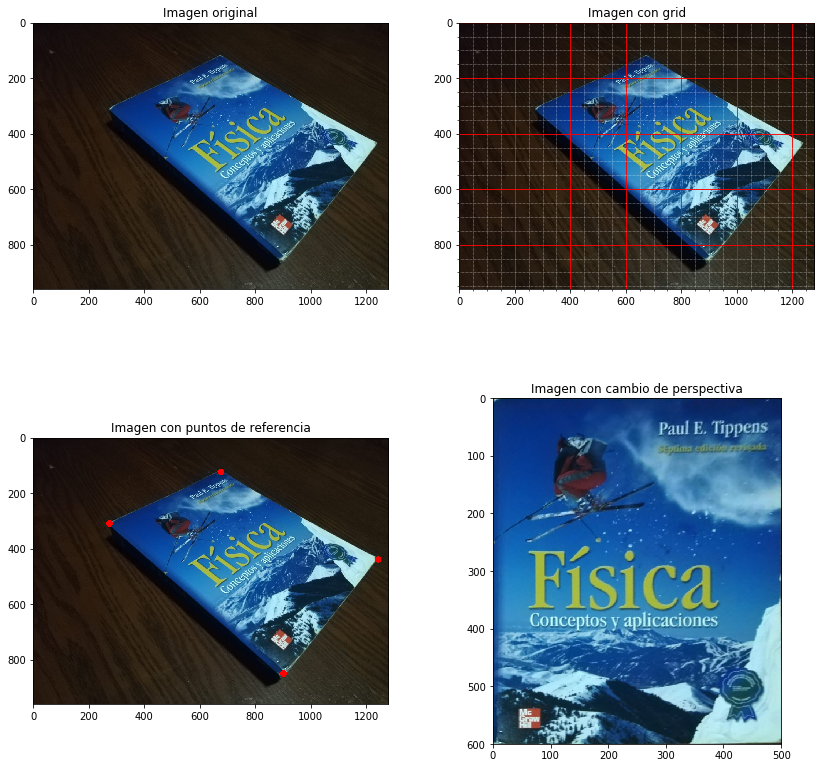

In [7]:
img = cv.imread("figuras/fisica.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_circles = cv.imread("figuras/fisica.jpg")             #Se realiza otra declaración porque una asignación directa cambiaría el valor del objeto de la imagen original
img_circles = cv.cvtColor(img_circles, cv.COLOR_BGR2RGB)  

cv.circle(img_circles, (275,310), 12, (255,0,0), -1)
cv.circle(img_circles, (675,125), 12, (255,0,0), -1)
cv.circle(img_circles, (900,850), 12, (255,0,0), -1)
cv.circle(img_circles, (1240,440), 12, (255,0,0), -1)

pts1 = np.float32([[275,310], [675,125], [900,850], [1240,440]])
pts2 = np.float32([[0,0], [500,0], [0,600], [500,600]])

matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img, matrix, (500,600))

plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.title("Imagen original")
plt.imshow(img)

plt.subplot(2,2,2)
plt.title("Imagen con grid")
plt.minorticks_on()
plt.grid(which="major", linestyle="-", linewidth="0.9", color="red")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="white")
plt.imshow(img)

plt.subplot(2,2,3)
plt.title("Imagen con puntos de referencia")
plt.imshow(img_circles)

plt.subplot(2,2,4)
plt.title("Imagen con cambio de perspectiva")
plt.imshow(img_warp)

plt.show()